In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [3]:
# define matrices for use with multivariate normal function
# u_1 = [1,2]
# cov_1 = [[1,0],[0,2]]

# u_2 = [-1,1]
# cov_2 = [[2,-1.8],[-1.8,2]]

# u_3 = [2,-2]
# cov_3 = [[3,1],[1,2]]
#cov_3 = [[1,1],[1,1]]

#x1, y1 = np.random.multivariate_normal(u_1, cov_1, 100).T
#x2, y2 = np.random.multivariate_normal(u_2, cov_2, 100).T
#x3, y3 = np.random.multivariate_normal(u_3, cov_3, 100).T

In [6]:
u_1 = np.array([[1],[2]])
cov_1 = np.array([[1,0],[0,2]])

u_2 = np.array([[-1],[1]])
cov_2 = np.array([[2,-1.8],[-1.8,2]])

u_3 = np.array([[2],[-2]])
cov_3 = np.array([[3,1],[1,2]])

In [7]:
n_pt = 100
rand_xy = np.squeeze(np.array([[np.random.randn(n_pt)],[np.random.randn(n_pt)]]))
#np.shape(rand_xy)
#sns.jointplot(rand_xy[0,:],rand_xy[1,:])

w1,v1 = scipy.linalg.eig(cov_1)
idx = w1.argsort()[::-1]   
w1 = np.real(w1[idx])
v1 = v1[:,idx]
a_1 = v1*(w1**0.5)

rand_xy_scale_1 = np.dot(a_1,rand_xy) + np.matlib.repmat(u_1,1,n_pt)
x1 = rand_xy_scale_1[0,:]
y1 = rand_xy_scale_1[1,:]

w2,v2 = scipy.linalg.eig(cov_2)
idx = w2.argsort()[::-1]   
w2 = np.real(w2[idx])
v2 = v2[:,idx]
a_2 = v2*(w2**0.5)

rand_xy = np.squeeze(np.array([[np.random.randn(n_pt)],[np.random.randn(n_pt)]]))
rand_xy_scale_2 = np.dot(a_2,rand_xy) + np.matlib.repmat(u_2,1,n_pt)
x2 = rand_xy_scale_2[0,:]
y2 = rand_xy_scale_2[1,:]

rand_xy = np.squeeze(np.array([[np.random.randn(n_pt)],[np.random.randn(n_pt)]]))
w3,v3 = scipy.linalg.eig(cov_3)
idx = w3.argsort()[::-1]   
w3 = np.real(w1[idx])
v3 = v3[:,idx]
a_3 = v3*(w3**0.5)

rand_xy_scale_3 = np.dot(a_3,rand_xy) + np.matlib.repmat(u_3,1,n_pt)
x3 = rand_xy_scale_3[0,:]
y3 = rand_xy_scale_3[1,:]


#sns.jointplot(rand_xy_scale[0,:],rand_xy_scale[1,:])
#np.mean(rand_xy_scale,axis=1)
#np.cov(rand_xy_scale)

In [8]:
w1_half = w1**0.5
cov_1_half = v1*w1_half*v1.T
rand_xy_scale_1_v2 = np.dot(a_1,rand_xy) + np.matlib.repmat(u_1,1,n_pt)

w2_half = w2**0.5
cov_2_half = v2*w2_half*v2.T
rand_xy_scale_2_v2 = np.dot(a_2,rand_xy) + np.matlib.repmat(u_2,1,n_pt)

w3_half = w3**0.5
cov_3_half = v3*w3_half*v3.T
rand_xy_scale_3_v2 = np.dot(a_3,rand_xy) + np.matlib.repmat(u_3,1,n_pt)

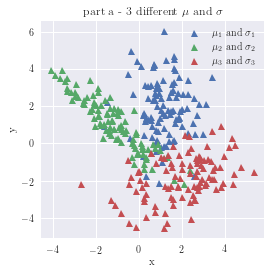

In [9]:
plt.figure()
plt.plot(x1,y1,'^',label=r'$ \mu_1$ and $\sigma_1$')
plt.plot(x2,y2,'^',label=r'$ \mu_2$ and $\sigma_2$')
plt.plot(x3,y3,'^',label=r'$ \mu_3$ and $\sigma_3$')
plt.title(r'part a - 3 different $ \mu$ and $\sigma$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(4, 4)
plt.savefig('hw1_1_a.png',dpi=600)

In [6]:
x1_mean = np.mean(x1)
y1_mean = np.mean(y1)
cov_1 = np.cov(x1,y1)

x2_mean = np.mean(x2)
y2_mean = np.mean(y2)
cov_2 = np.cov(x2,y2)

x3_mean = np.mean(x3)
y3_mean = np.mean(y3)
cov_3 = np.cov(x3,y3)

In [7]:
x1_mean
y1_mean
cov_1

x2_mean
y2_mean
cov_2

x3_mean
y3_mean
cov_3

orig_1 = np.array([x1_mean,y1_mean])
orig_2 = np.array([x2_mean, y2_mean])
orig_3 = np.array([x3_mean, y3_mean])

orig_1
orig_2
orig_3

1.136376733152793

2.0280824577017871

array([[ 1.1313097 , -0.0033863 ],
       [-0.0033863 ,  1.70413419]])

-1.112139565327791

1.1349680259338191

array([[ 2.06949888, -1.93262522],
       [-1.93262522,  2.19222601]])

1.8891389448491132

-2.0413241807512312

array([[ 1.67375088,  0.28624387],
       [ 0.28624387,  1.31764488]])

array([ 1.13637673,  2.02808246])

array([-1.11213957,  1.13496803])

array([ 1.88913894, -2.04132418])

In [8]:
w1,v1 = scipy.linalg.eig(cov_1)
w2,v2 = scipy.linalg.eig(cov_2)
w3,v3 = scipy.linalg.eig(cov_3)

idx = w1.argsort()[::-1]   
w1 = w1[idx]
v1 = v1[:,idx]

idx = w2.argsort()[::-1]   
w2 = w2[idx]
v2 = v2[:,idx]

idx = w3.argsort()[::-1]   
w3 = w3[idx]
v3 = v3[:,idx]

In [9]:
mags_1 = w1**0.5
mags_2 = w2**0.5
mags_3 = w3**0.5

mags_1
mags_2
mags_3

array([ 1.30543258+0.j,  1.06362103+0.j])

array([ 2.01605099+0.j,  0.44414331+0.j])

array([ 1.35380976+0.j,  1.07638046+0.j])

In [10]:
pts_1_1 = np.real(v1[:,0]*mags_1[0]) + orig_1
pts_1_2 = np.real(v1[:,1]*mags_1[1]) + orig_1

pts_2_1 = np.real(v2[:,0]*mags_2[0]) + orig_2
pts_2_2 = np.real(v2[:,1]*mags_2[1]) + orig_2

pts_3_1 = np.real(v3[:,0]*mags_3[0]) + orig_3
pts_3_2 = np.real(v3[:,1]*mags_3[1]) + orig_3

<function matplotlib.pyplot.figure>

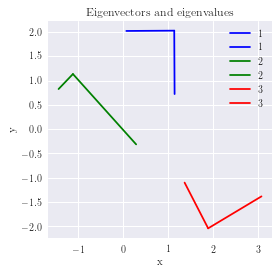

In [11]:
plt.figure
plt.plot([orig_1[0],pts_1_1[0]],[orig_1[1],pts_1_1[1]],label='1',color='blue')
plt.plot([orig_1[0],pts_1_2[0]],[orig_1[1],pts_1_2[1]],label='1',color='blue')

plt.plot([orig_2[0],pts_2_1[0]],[orig_2[1],pts_2_1[1]],label='2',color='green')
plt.plot([orig_2[0],pts_2_2[0]],[orig_2[1],pts_2_2[1]],label='2',color='green')

plt.plot([orig_3[0],pts_3_1[0]],[orig_3[1],pts_3_1[1]],label='3',color='red')
plt.plot([orig_3[0],pts_3_2[0]],[orig_3[1],pts_3_2[1]],label='3',color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvectors and eigenvalues')

fig = plt.gcf()
fig.set_size_inches(4,4)
plt.savefig('hw1_1_b.png',dpi=600)

<function matplotlib.pyplot.figure>

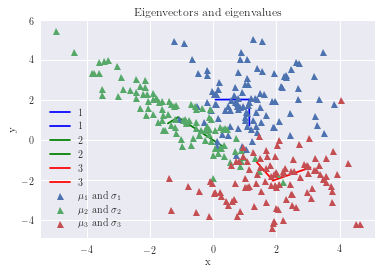

In [12]:
plt.figure
plt.plot([orig_1[0],pts_1_1[0]],[orig_1[1],pts_1_1[1]],label='1',color='blue')
plt.plot([orig_1[0],pts_1_2[0]],[orig_1[1],pts_1_2[1]],label='1',color='blue')

plt.plot([orig_2[0],pts_2_1[0]],[orig_2[1],pts_2_1[1]],label='2',color='green')
plt.plot([orig_2[0],pts_2_2[0]],[orig_2[1],pts_2_2[1]],label='2',color='green')

plt.plot([orig_3[0],pts_3_1[0]],[orig_3[1],pts_3_1[1]],label='3',color='red')
plt.plot([orig_3[0],pts_3_2[0]],[orig_3[1],pts_3_2[1]],label='3',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvectors and eigenvalues')

plt.plot(x1,y1,'^',label=r'$ \mu_1$ and $\sigma_1$')
plt.plot(x2,y2,'^',label=r'$ \mu_2$ and $\sigma_2$')
plt.plot(x3,y3,'^',label=r'$ \mu_3$ and $\sigma_3$')
plt.legend()



In [13]:
mags_1 = w1**0.5
mags_2 = w2**0.5
mags_3 = w3**0.5

# for i = 1 
x_1_scale = np.squeeze([[x1-x1_mean],[y1-y1_mean]])

u1_scale_1 = v1[:,0]/mags_1[0]
u1_scale_1 = np.expand_dims(u1_scale_1, axis=1)
x_til_1_1 = np.squeeze(np.dot(u1_scale_1.T,x_1_scale))

u1_scale_2 = v1[:,1]/mags_1[1]
u1_scale_2 = np.expand_dims(u1_scale_2, axis=1)
x_til_1_2 = np.squeeze(np.dot(u1_scale_2.T,x_1_scale))

# for i = 2 
x_2_scale = np.squeeze([[x2-x2_mean],[y2-y2_mean]])

u2_scale_1 = v2[:,0]/mags_2[0]
u2_scale_1 = np.expand_dims(u2_scale_1, axis=1)
x_til_2_1 = np.squeeze(np.dot(u2_scale_1.T,x_2_scale))

u2_scale_2 = v2[:,1]/mags_2[1]
u2_scale_2 = np.expand_dims(u2_scale_2, axis=1)
x_til_2_2 = np.squeeze(np.dot(u2_scale_2.T,x_2_scale))

# for i = 3 
x_3_scale = np.squeeze([[x3-x3_mean],[y3-y3_mean]])

u3_scale_1 = v3[:,0]/mags_3[0]
u3_scale_1 = np.expand_dims(u3_scale_1, axis=1)
x_til_3_1 = np.squeeze(np.dot(u1_scale_1.T,x_1_scale))

u3_scale_2 = v3[:,1]/mags_3[1]
u3_scale_2 = np.expand_dims(u3_scale_2, axis=1)
x_til_3_2 = np.squeeze(np.dot(u3_scale_2.T,x_3_scale))

C:\Users\djcald.CSENETID\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


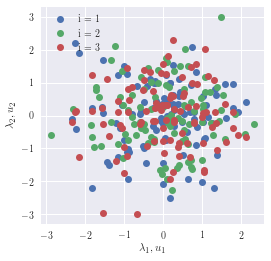

In [14]:
plt.plot(x_til_1_1,x_til_1_2,'o',label='i = 1');
plt.plot(x_til_2_1,x_til_2_2,'o',label='i = 2');
plt.plot(x_til_3_1,x_til_3_2,'o',label='i = 3');
plt.legend()
plt.xlabel(r'$\lambda_1 , u_1$')
plt.ylabel(r'$\lambda_2 , u_2$')
plt.title('')
fig = plt.gcf()
fig.set_size_inches(4, 4)
plt.savefig('hw1_1_c.png',dpi=600)